In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [23]:
df =pd.read_csv('../data/KaggleV2-May-2016.csv')

In [24]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


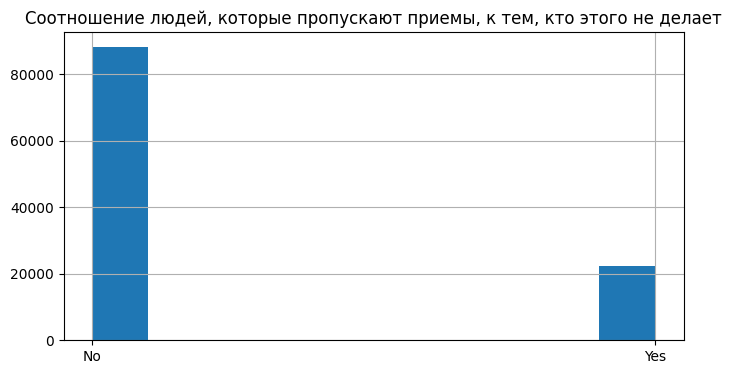

In [26]:
plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');


In [27]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

In [28]:
df[df['No-show'] == 'Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

In [29]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

---

In [30]:
import logging
from importlib import reload

In [31]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG: 2023-01-30 11:35:51,727: This is a debug message
INFO: 2023-01-30 11:35:51,728: This is an informational message
ERROR: 2023-01-30 11:35:51,729: This is an error message
CRITICAL: 2023-01-30 11:35:51,730: This is a critical message


In [32]:
reload(logging)
logging.basicConfig(level=logging.DEBUG)

In [33]:
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


In [34]:
logging.FileHandler('log_file.log')

<FileHandler /Users/hotdonkey/Documents/GitHub/data_science_learning/code/skillfactory/EDA/EDA_6/log_file.log (NOTSET)>

In [35]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-01-30 11:35:51,813: Check


In [36]:
# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
    """[Создает лог-файл для логирования в него]
    Аргументы:
        path {string} -- путь к директории
        file {string} -- имя файла
    Возвращает:
        [obj] -- [логер]
    """
    # проверяем, существует ли файл
    log_file = os.path.join(path, file)

    # если  файла нет, создаем его
    if not os.path.isfile(log_file):
        open(log_file, "w+").close()

    # поменяем формат логирования
    file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"

    # конфигурируем лог-файл
    logging.basicConfig(level=logging.INFO,
                        format=file_logging_format)
    logger = logging.getLogger()

    # создадим хэнлдер для записи лога в файл
    handler = logging.FileHandler(log_file)

    # установим уровень логирования
    handler.setLevel(logging.INFO)

    # создадим формат логирования, используя file_logging_format
    formatter = logging.Formatter(file_logging_format)
    handler.setFormatter(formatter)

    # добавим хэндлер лог-файлу
    logger.addHandler(handler)
    return logger


In [37]:
# создаем лог-файл
logger = get_logger(path="../logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-01-30 11:35:51,855: Data
INFO: 2023-01-30 11:35:51,856: Data shape (110527, 14)
INFO: 2023-01-30 11:35:51,866: Percentage of women: 0.653882342398853
INFO: 2023-01-30 11:35:51,876: Percentage of men: 0.346117657601147


In [38]:
if df.shape != (110526,14):
    logger.error('Data shape is incorrect!')

ERROR: 2023-01-30 11:35:51,896: Data shape is incorrect!


---

In [41]:
from comet_ml import Experiment

# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="WAXoelkf8lkxGt9Up0VQ7L4Nn",
    project_name="medical-appointment",
    workspace="hotdonkey",
)

DEBUG: 2023-01-30 12:24:24,130: No INI file found: []
DEBUG: 2023-01-30 12:24:24,137: No INI file found: ['./.comet.config']
DEBUG: 2023-01-30 12:24:24,142: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-01-30 12:24:24,145: No INI file found: ['~/.comet.config']
DEBUG: 2023-01-30 12:24:24,152: Looking up key: hide_api_key, namespace: ['comet', 'logging']
DEBUG: 2023-01-30 12:24:24,153: Searching <ConfigOSEnv> for COMET_LOGGING_HIDE_API_KEY
DEBUG: 2023-01-30 12:24:24,154: Searching <ConfigEnvFileEnv: None> for COMET_LOGGING_HIDE_API_KEY
DEBUG: 2023-01-30 12:24:24,155: Searching <ConfigDictEnv: {}> for COMET_LOGGING_HIDE_API_KEY
DEBUG: 2023-01-30 12:24:24,156: Found nothing--returning NO_VALUE
DEBUG: 2023-01-30 12:24:24,158: No INI file found: []
DEBUG: 2023-01-30 12:24:24,158: No INI file found: ['./.comet.config']
DEBUG: 2023-01-30 12:24:24,159: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-01-30 12:24:24,159: No INI file found: ['~/.c